In [1]:
# importing packages
import numpy as np 
import pandas as pd
from bs4 import BeautifulSoup
import requests
import urllib
import json
import csv
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude value
!conda install -c conda-forge folium=0.5.0 --yes
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # plotting library
print('Folium installed')
from sklearn import preprocessing
import geopy
from sklearn.preprocessing import StandardScaler

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed


In [2]:
# link to Superneighborhood Data to get location and area data 
SN_url=("https://opendata.arcgis.com/datasets/f50cc53c15bf4fb3940ab6e8c2534f3d_2.geojson")
with urllib.request.urlopen(SN_url) as url:
    sn=json.loads(url.read().decode())
#sn = requests.get(SN_url).json()
#sn
sn

{'type': 'FeatureCollection',
 'name': 'COH_DEMOGRAPHICS_-_MIL',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'SUM_POP100': 3881,
    'SUM_HU100': 2104,
    'SUM_TotPop': 3881,
    'SUM_HispPop': 711,
    'SUM_NonHispPop': 3170,
    'SUM_NHOneRace': 3091,
    'SUM_NH_White': 1353,
    'SUM_NH_Black': 1396,
    'SUM_NH_AmInd': 11,
    'SUM_NH_Asian': 321,
    'SUM_NH_HawPacI': 1,
    'SUM_NH_Other': 9,
    'SUM_NH_2orMore': 79,
    'SUM_VAP_TotPop': 3103,
    'SUM_VAP_HispPo': 544,
    'SUM_VAP_NonHis': 2559,
    'SUM_VAP_NHOneR': 2510,
    'SUM_VAP_NH_Whi': 1310,
    'SUM_VAP_NH_Bla': 885,
    'SUM_VAP_NH_AmI': 11,
    'SUM_VAP_NH_Asi': 296,
    'SUM_VAP_HawPac': 1,
    'SUM_VAP_NH_Oth': 7,
    'SUM_VAP_NH_2or': 49,
    'SUM_TotHousing': 2104,
    'SUM_OccHU': 1978,
    'SUM_VacantHU': 126,
    'POLYID': 60,
    'Name': 'FOURTH WARD',
    'Shapearea': 12969824.766383596,
    '

In [3]:
sn_houston=sn['features']
range(len(sn_houston))

range(0, 88)

In [345]:
test=sn_houston[1]['geometry']['coordinates'][0]

column_names1= ['lat','lon']




neigh_latlong=pd.DataFrame(columns=column_names1)
for i in range(len(test)):
    lat=test[i][0]
    lon=test[i][1]
    
    neigh_latlong = neigh_latlong.append({'lat':lat,'lon':lon},ignore_index=True)
    
k_means=KMeans(init="random",n_clusters=1,n_init=10)
yhat=k_means.fit(neigh_latlong)

centroid=yhat.cluster_centers_   
print(centroid)

[[-95.33163351  29.75171522]]


In [5]:
sn_houston[1]['geometry']['coordinates'][0][1]

[-95.3206608149387, 29.756523898590903]

In [6]:
# defining data frame columns
column_names=['Neighborhood','Latitude','Longitude','Sum_TotPop','Hisp_Pop','White_Pop','Black_Pop','AmInd','Asian','HawPacI','Other','2orMore','Area']

#creating data frame
Houston_neighborhoods=pd.DataFrame(columns=column_names)
Houston_neighborhoods = Houston_neighborhoods.astype({'Latitude':'float64', 'Longitude':'float64'})
# running through neighborhoods to create data base
for data in range(len(sn_houston)):
    neighborhood = sn_houston[data]['properties']['Name'] 
    tot_pop = sn_houston[data]['properties']['SUM_POP100']
    h_pop=sn_houston[data]['properties']['SUM_HispPop']
    w_pop=sn_houston[data]['properties']['SUM_NH_White']
    b_pop=sn_houston[data]['properties']['SUM_NH_Black']
    ai_pop=sn_houston[data]['properties']['SUM_NH_AmInd']
    as_pop=sn_houston[data]['properties']['SUM_NH_Asian']
    hpi_pop=sn_houston[data]['properties']['SUM_NH_HawPacI']
    o_pop=sn_houston[data]['properties']['SUM_NH_Other']
    tm_pop=sn_houston[data]['properties']['SUM_NH_2orMore']
    area=sn_houston[data]['properties']['Shapearea']
    # Sum of Lesser Groups
    sum_AI_HPI_O_2M= (ai_pop+hpi_pop+o_pop+tm_pop)
    
    column_names1= ['lat','lon']
    len2=len(sn_houston[data]['geometry']['coordinates'][0])
    # finding center of geometry from polygon by taking average of lat and long
      #data is the neighborhood, [0] is to get to the correct [] 
    neigh_latlong=pd.DataFrame(columns=column_names1, dtype='float64')  # creating data frame for lat long
    for i in range(len(sn_houston[data]['geometry']['coordinates'][0])):
        lon=sn_houston[data]['geometry']['coordinates'][0][i][0]
        lat=sn_houston[data]['geometry']['coordinates'][0][i][1]

    
        neigh_latlong = neigh_latlong.append({'lat':lat,'lon':lon},ignore_index=True)
        
    
# simplified to calculate a center, take the mean, min and max and average        
    lat_min=neigh_latlong['lat'].min()
    lat_max=neigh_latlong['lat'].max()
    lon_min=neigh_latlong['lon'].min()
    lon_max=neigh_latlong['lon'].max()
    lat_m=neigh_latlong['lat'].mean()
    lon_m=neigh_latlong['lon'].mean()

    lat_p=(lat_min+lat_max+lat_m)/3
    lon_p=(lon_min+lon_max+lon_m)/3
    
    
    
    Houston_neighborhoods = Houston_neighborhoods.append({'Neighborhood': neighborhood,
                                                      'Latitude': lat_p,
                                                      'Longitude': lon_p,
                                                      'Sum_TotPop': tot_pop,
                                                      'Hisp_Pop': h_pop,
                                                      'White_Pop': w_pop,
                                                      'Black_Pop': b_pop,
                                                      'AmInd' : ai_pop,
                                                      'Asian' : as_pop,
                                                      'HawPacI': hpi_pop,
                                                      'Other': o_pop,
                                                      '2orMore': tm_pop,
                                                      'Area': area,
                                                      'AmInd/HawPacI/Other/2orMore':sum_AI_HPI_O_2M
                                                        }, ignore_index=True)


In [106]:
Houston_neighborhoods.dtypes
Houston_neighborhoods[['Sum_TotPop','Hisp_Pop','White_Pop','Black_Pop','AmInd','Asian','HawPacI','Other','2orMore','Area','AmInd/HawPacI/Other/2orMore','Density']] = Houston_neighborhoods[['Sum_TotPop','Hisp_Pop','White_Pop','Black_Pop','AmInd','Asian','HawPacI','Other','2orMore','Area','AmInd/HawPacI/Other/2orMore','Density']].astype('int')
Houston_neighborhoods.dtypes

Neighborhood                    object
Latitude                       float64
Longitude                      float64
Sum_TotPop                       int32
Hisp_Pop                         int32
White_Pop                        int32
Black_Pop                        int32
AmInd                            int32
Asian                            int32
HawPacI                          int32
Other                            int32
2orMore                          int32
Area                             int32
AmInd/HawPacI/Other/2orMore      int32
Density                          int32
dtype: object

In [107]:

H_query=Houston_neighborhoods[['Neighborhood','Latitude','Longitude']]
H_query1=H_query.set_index("Neighborhood")
H_query1=H_query1.drop('ASTRODOME AREA',axis=0).reset_index()
H_query1['Neighborhood'].unique

<bound method Series.unique of 0                    FOURTH WARD
1                    SECOND WARD
2                       DOWNTOWN
3     CLINTON PARK TRI-COMMUNITY
4                 GREATER UPTOWN
                 ...            
82              BRIARFOREST AREA
83           NEARTOWN - MONTROSE
84                      MEMORIAL
85            SPRING BRANCH WEST
86              ADDICKS PARK TEN
Name: Neighborhood, Length: 87, dtype: object>

In [377]:
Houston_neighborhoods['Density']=Houston_neighborhoods['Sum_TotPop']/Houston_neighborhoods['Area']
H_neigh=Houston_neighborhoods[['Neighborhood','Latitude','Longitude','Area','Sum_TotPop','Density','Hisp_Pop','White_Pop','Black_Pop','Asian','AmInd/HawPacI/Other/2orMore']]

H_neigh

Neighborhood   Latitude  Longitude       Area  Sum_TotPop  \
0                  FOURTH WARD  29.757772 -95.379917   12969824        3881   
1                  SECOND WARD  29.751753 -95.328022   80404724       13471   
2                     DOWNTOWN  29.756470 -95.357427   75500230       16716   
3   CLINTON PARK TRI-COMMUNITY  29.746858 -95.262554   76553521        2497   
4               GREATER UPTOWN  29.760368 -95.483757  229792131       49277   
..                         ...        ...        ...        ...         ...   
83            BRIARFOREST AREA  29.753538 -95.566546  187515217       39031   
84         NEARTOWN - MONTROSE  29.749973 -95.396487   91165504       28957   
85                    MEMORIAL  29.763381 -95.581005  275312088       45294   
86          SPRING BRANCH WEST  29.803860 -95.569373  229021374       31352   
87            ADDICKS PARK TEN  29.824214 -95.638446  653292432        7323   

     Density  Hisp_Pop  White_Pop  Black_Pop  Asian  \
0   0.000299       711       1353       1396    321   
1   0.000168     10603       1063       1623     78   
2   0.000221      3266       6092       6562    355   
3   0.000033       603         15       1853      6   
4   0.000214      7311      34063       2291   4551   
..       ...       ...        ...        ...    ...   
83  0.000208      8992      19291       7436   2419   
84  0.000318      5738      19810       1109   1650   
85  0.000165      5951      30868       2575   4882   
86  0.000137     18051       9669       1510   1681   
87  0.000011      2121       2849       1471    649   

    AmInd/HawPacI/Other/2orMore  
0                           100  
1                           104  
2                           441  
3                            20  
4                          1061  
..                          ...  
83                          893  
84                          650  
85                         1018  
86                          441  
87                          233  

[88 rows x 11 columns]

In [445]:
# create map of Houston using latitude and longitude values
h_lat=29.7604
h_lon=-95.3698
map_houston = folium.Map(location=[h_lat, h_lon], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(Houston_neighborhoods['Latitude'], Houston_neighborhoods['Longitude'], Houston_neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        scale=True,
        parse_html=False).add_to(map_houston)  
    
map_houston

In [13]:
CLIENT_ID = 'FH3333ULEPXXJN0IUXBY5L0WXFA05HYTSWCSUVBDH1NLFHST' # my Foursquare ID
CLIENT_SECRET = 'P0FGKF5TQ2Y1IWHHLHFHOJON5ZNOWAYRLEKYHZE1IOT5F0RU' # my Foursquare Secret
VERSION = '20200202'

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: FH3333ULEPXXJN0IUXBY5L0WXFA05HYTSWCSUVBDH1NLFHST
CLIENT_SECRET:P0FGKF5TQ2Y1IWHHLHFHOJON5ZNOWAYRLEKYHZE1IOT5F0RU


In [15]:
neighborhood_latitude= Houston_neighborhoods.loc[0,'Latitude']
neighborhood_longitude= Houston_neighborhoods.loc[0,'Longitude']
category_id=['4d4b7105d754a06374d81259','4bf58dd8d48988d1f9941735','52f2ab2ebcbc57f1066b8b1c','50be8ee891d4fa8dcc7199a7']
LIMIT=2
radius=3218
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&categoryId=4d4b7105d754a06374d81259&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION,radius, LIMIT)
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5efa67a07f806936912188f7'},
 'response': {'venues': [{'id': '4cfbf9f02d80a1434b8f4ed8',
    'name': 'Agora',
    'location': {'address': '1712 Westheimer Rd',
     'crossStreet': 'Park St',
     'lat': 29.742873661933928,
     'lng': -95.40265800167606,
     'labeledLatLngs': [{'label': 'display',
       'lat': 29.742873661933928,
       'lng': -95.40265800167606}],
     'distance': 2753,
     'postalCode': '77098',
     'cc': 'US',
     'city': 'Houston',
     'state': 'TX',
     'country': 'United States',
     'formattedAddress': ['1712 Westheimer Rd (Park St)',
      'Houston, TX 77098',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '1817932',
     'url': 'http

In [16]:
results=requests.get(url).json()["response"]['venues'][0]

In [25]:

def getNearbyVenues(neighborhoods, latitudes, longitudes):
    venues_list=[]
    for neighborhood, lat, lng in zip(neighborhoods,latitudes,longitudes):
            
            
                # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId=4d4b7105d754a06374d81259,4bf58dd8d48988d1f9941735,52f2ab2ebcbc57f1066b8b1c,50be8ee891d4fa8dcc7199a7&radius={}'.format(
                    CLIENT_ID, 
                    CLIENT_SECRET, 
                    VERSION, 
                    lat, 
                    lng,
                    radius)
            
            # make the GET request
            results = requests.get(url).json()["response"]['venues']
        

            # return only relevant information for each nearby venue 
            venues_list.append([(
                    neighborhood,
                    lat, 
                    lng, 
                    v['name'], 
                    v['location']['lat'], 
                    v['location']['lng'],  
                    v['categories'][0]['name']) for v in results])
            print(neighborhood)
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                 'Neighborhood Latitude', 
                 'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
#categories=4d4b7105d754a06374d81259,4bf58dd8d48988d1f9941735,52f2ab2ebcbc57f1066b8b1c,50be8ee891d4fa8dcc7199a7

h_venues_cat2=getNearbyVenues(neighborhoods=H_query1['Neighborhood'],latitudes=H_query1['Latitude'],longitudes=H_query1['Longitude'])


FOURTH WARD
SECOND WARD
DOWNTOWN
CLINTON PARK TRI-COMMUNITY
GREATER UPTOWN
GREATER INWOOD
GREATER HOBBY AREA
GOLFCREST / BELLFORT / REVEILLE
ELDRIDGE / WEST OAKS
WASHINGTON AVENUE COALITION / MEMORIAL PARK
GREATER FIFTH WARD
DENVER HARBOR / PORT HOUSTON
PLEASANTVILLE AREA
NORTHSHORE
LAZY BROOK / TIMBERGROVE
GREATER HEIGHTS
KASHMERE GARDENS
MINNETEX
NORTHSIDE VILLAGE
SPRING BRANCH EAST
SPRING BRANCH NORTH
EL DORADO / OATES PRAIRIE
SPRING BRANCH CENTRAL
HUNTERWOOD
SETTEGAST
LANGWOOD
INDEPENDENCE HEIGHTS
CENTRAL NORTHWEST
TRINITY / HOUSTON GARDENS
CARVERDALE
EASTEX - JENSEN AREA
EAST HOUSTON
ACRES HOME
NORTHSIDE/NORTHLINE
HIDDEN VALLEY
EAST LITTLE YORK / HOMESTEAD
WILLOWBROOK
GREATER GREENSPOINT
IAH / AIRPORT AREA
KINGWOOD AREA
LAKE HOUSTON
FAIRBANKS / NORTHWEST CROSSING
WESTBRANCH
SHARPSTOWN
WESTWOOD
FORT BEND / HOUSTON
FONDREN GARDENS
SOUTH BELT / ELLINGTON
SOUTH ACRES / CRESTMONT PARK
BRAYS OAKS
CENTRAL SOUTHWEST
SUNNYSIDE
ALIEF
PECAN PARK
CLEAR LAKE
WESTBURY
WILLOW MEADOWS / WILLOWBEN

In [378]:
h_venues_cat2

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          FOURTH WARD              29.757772              -95.379917   
1          FOURTH WARD              29.757772              -95.379917   
2          FOURTH WARD              29.757772              -95.379917   
3          FOURTH WARD              29.757772              -95.379917   
4          FOURTH WARD              29.757772              -95.379917   
...                ...                    ...                     ...   
2565  ADDICKS PARK TEN              29.824214              -95.638446   
2566  ADDICKS PARK TEN              29.824214              -95.638446   
2567  ADDICKS PARK TEN              29.824214              -95.638446   
2568  ADDICKS PARK TEN              29.824214              -95.638446   
2569  ADDICKS PARK TEN              29.824214              -95.638446   

                                    Venue  Venue Latitude  Venue Longitude  \
0     Spec's Wines, Spirits & Finer Foods       29.748694       -95.376949   
1                                  Kroger       29.773624       -95.389976   
2                   Buffalo Heights H-E-B       29.769018       -95.396575   
3                  Sprouts Farmers Market       29.774637       -95.400231   
4                                   Agora       29.742874       -95.402658   
...                                   ...             ...              ...   
2565                         miyabi sushi       29.840069       -95.645022   
2566                Hank's Cajun Crawfish       29.838179       -95.645929   
2567                             3 Salsas       29.836970       -95.646327   
2568                        Frank's Grill       29.835400       -95.645349   
2569                     TAqueria Jalisco       29.831179       -95.660847   

                 Venue Category  
0                  Liquor Store  
1                   Supermarket  
2                 Grocery Store  
3                 Grocery Store  
4                   Coffee Shop  
...                         ...  
2565           Sushi Restaurant  
2566  Cajun / Creole Restaurant  
2567         Mexican Restaurant  
2568                      Diner  
2569                 Taco Place  

[2570 rows x 7 columns]

In [30]:
h_venues_cat2['Neighborhood'].unique()

array(['FOURTH WARD', 'SECOND WARD', 'DOWNTOWN',
       'CLINTON PARK TRI-COMMUNITY', 'GREATER UPTOWN', 'GREATER INWOOD',
       'GREATER HOBBY AREA', 'GOLFCREST / BELLFORT / REVEILLE',
       'ELDRIDGE / WEST OAKS',
       'WASHINGTON AVENUE COALITION / MEMORIAL PARK',
       'GREATER FIFTH WARD', 'DENVER HARBOR / PORT HOUSTON',
       'PLEASANTVILLE AREA', 'NORTHSHORE', 'LAZY BROOK / TIMBERGROVE',
       'GREATER HEIGHTS', 'KASHMERE GARDENS', 'MINNETEX',
       'NORTHSIDE VILLAGE', 'SPRING BRANCH EAST', 'SPRING BRANCH NORTH',
       'EL DORADO / OATES PRAIRIE', 'SPRING BRANCH CENTRAL', 'HUNTERWOOD',
       'SETTEGAST', 'LANGWOOD', 'INDEPENDENCE HEIGHTS',
       'CENTRAL NORTHWEST', 'TRINITY / HOUSTON GARDENS', 'CARVERDALE',
       'EASTEX - JENSEN AREA', 'EAST HOUSTON', 'ACRES HOME',
       'NORTHSIDE/NORTHLINE', 'HIDDEN VALLEY',
       'EAST LITTLE YORK / HOMESTEAD', 'WILLOWBROOK',
       'GREATER GREENSPOINT', 'IAH / AIRPORT AREA', 'KINGWOOD AREA',
       'LAKE HOUSTON', 'FAIRBANKS

In [34]:
h_venues=h_venues_cat2

In [35]:
h_venues['Venue Category'].shape

(2570,)

In [443]:
# create map of New York using latitude and longitude values
h_lat=29.7604
h_lon=-95.3698
map_houston = folium.Map(location=[h_lat, h_lon], zoom_start=10)

# add markers to map
for lat, lng, neighborhoood, venue in zip(h_venues['Venue Latitude'], h_venues['Venue Longitude'], h_venues['Neighborhood'],h_venues['Venue']):
    label = '{},{}'.format(neighborhood,venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)   
    
map_houston

In [51]:
# one hot encoding
houston_onehot = pd.get_dummies(h_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
houston_onehot['Neighborhood'] = h_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [houston_onehot.columns[-1]] + list(houston_onehot.columns[:-1])
houston_onehot = houston_onehot[fixed_columns]

houston_onehot.columns.values

array(['Neighborhood', 'African Restaurant', 'Airport Food Court',
       'American Restaurant', 'Aquarium', 'Arcade',
       'Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint',
       'Bagel Shop', 'Bakery', 'Bar', 'Beer Bar', 'Beer Garden',
       'Beer Store', 'Big Box Store', 'Breakfast Spot', 'Brewery',
       'Bubble Tea Shop', 'Buffet', 'Burger Joint', 'Burrito Place',
       'Butcher', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant',
       'Caribbean Restaurant', 'Cheese Shop', 'Chinese Restaurant',
       'Churrascaria', 'Cocktail Bar', 'Coffee Shop',
       'Comfort Food Restaurant', 'Convenience Store',
       'Convention Center', 'Creperie', 'Cuban Restaurant',
       'Cupcake Shop', 'Deli / Bodega', 'Dessert Shop',
       'Dim Sum Restaurant', 'Diner', 'Doner Restaurant', 'Donut Shop',
       'Dumpling Restaurant', 'Event Space', 'Farmers Market',
       'Fast Food Restaurant', 'Filipino Restaurant', 'Flea Market',
       'Food', 'Food & Drink Shop', 'Food Court',

In [472]:
# From Column List Making list of Bars/Wine to Group
h_bars=houston_onehot[['Neighborhood','Bar','Beer Bar','Cocktail Bar','Beer Store','Beer Garden','Wine Shop','Wine Bar','Brewery','Hotel','Lounge','Sports Bar']]
h_bars=h_bars.groupby('Neighborhood').sum().reset_index()
h_bars['Sum_Bars']=h_bars.sum(axis=1)
h_bars

# Creating list of Food Markets
h_onehot_grocery=houston_onehot[['Neighborhood','Farmers Market','Market','Butcher','Supermarket','Grocery Store','Bakery','Big Box Store','Fruit & Vegetable Store']]
h_grocery=h_onehot_grocery.groupby('Neighborhood').sum().reset_index()
h_grocery['Sum_FoodMarkets']=h_grocery.sum(axis=1)
h_grocery

# Creating list of Resturants
column_list=['Aquarium','Event Space','Arcade','Music Venue','Warehouse','Flea Market','Bar','Beer Garden','Beer Bar','Cocktail Bar','Beer Store','Wine Shop','Wine Bar','Brewery','Hotel','Lounge','Sports Bar','Farmers Market','Market','Butcher','Supermarket','Grocery Store','Bakery','Big Box Store','Fruit & Vegetable Store']
h_resturants=houston_onehot.drop(columns=column_list,axis=1)
h_resturants=h_resturants.groupby('Neighborhood').sum().reset_index()
h_resturants['Sum_Resturants']=h_resturants.sum(axis=1)
h_resturants

Neighborhood  African Restaurant  Airport Food Court  \
0                         ACRES HOME                   0                   0   
1                   ADDICKS PARK TEN                   0                   0   
2       AFTON OAKS / RIVER OAKS AREA                   0                   0   
3                              ALIEF                   0                   0   
4                           BRAEBURN                   1                   0   
..                               ...                 ...                 ...   
82                          WESTBURY                   0                   0   
83                         WESTCHASE                   0                   0   
84                          WESTWOOD                   0                   0   
85  WILLOW MEADOWS / WILLOWBEND AREA                   0                   0   
86                       WILLOWBROOK                   0                   0   

    American Restaurant  Argentinian Restaurant  Asian Restaurant  BBQ Joint  \
0                     0                       0                 0          1   
1                     0                       0                 0          0   
2                     0                       0                 0          0   
3                     0                       0                 2          0   
4                     1                       0                 0          1   
..                  ...                     ...               ...        ...   
82                    1                       0                 0          1   
83                    0                       0                 0          0   
84                    0                       0                 0          1   
85                    1                       0                 0          1   
86                    2                       0                 0          0   

    Bagel Shop  Breakfast Spot  Bubble Tea Shop  ...  Taco Place  \
0            0               0                0  ...           0   
1            0               1                0  ...           1   
2            0               0                0  ...           0   
3            0               0                1  ...           0   
4            1               0                0  ...           0   
..         ...             ...              ...  ...         ...   
82           0               1                0  ...           0   
83           0               0                3  ...           0   
84           0               0                5  ...           0   
85           0               1                0  ...           0   
86           0               0                0  ...           0   

    Taiwanese Restaurant  Tea Room  Tex-Mex Restaurant  Thai Restaurant  \
0                      0         0                   0                0   
1                      0         0                   1                0   
2                      0         0                   0                0   
3                      0         0                   0                1   
4                      0         0                   0                0   
..                   ...       ...                 ...              ...   
82                     0         0                   0                0   
83                     1         0                   0                0   
84                     1         0                   0                0   
85                     0         1                   0                0   
86                     0         0                   0                0   

    Truck Stop  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0            0                              0                      0   
1            0                              0                      2   
2            0                              0                      0   
3            0                              1                      6   
4            0          

In [473]:
# Merging Groups and dropping all but sums

h_group_merge=h_resturants.join(h_grocery.set_index('Neighborhood'),on='Neighborhood')
h_group_merge=h_group_merge.join(h_bars.set_index('Neighborhood'),on='Neighborhood')
h_group_info=pd.merge(h_group_merge,H_neigh[['Neighborhood','Sum_TotPop']],on='Neighborhood',how='left')
#Getting the mean of each Type
#h_group_merge_mean=h_group_merge_sum.groupby('Neighborhood').mean().reset_index()
#h_group_merge_mean
#h_group_merge_sum=H_neigh.join(h_group_merge_sum.set_index('Neighborhood'),on='Neighborhood')

h_group_info1=h_group_info[['Neighborhood','Sum_TotPop','Sum_Bars','Sum_FoodMarkets','Sum_Resturants']].copy()
h_group_info1

Neighborhood  Sum_TotPop  Sum_Bars  Sum_FoodMarkets  \
0                         ACRES HOME       24465         0                2   
1                   ADDICKS PARK TEN        7323         0                3   
2       AFTON OAKS / RIVER OAKS AREA       14007         1               11   
3                              ALIEF      102235         0                6   
4                           BRAEBURN       19341         0                7   
..                               ...         ...       ...              ...   
82                          WESTBURY       20046         0               11   
83                         WESTCHASE       29074         0               10   
84                          WESTWOOD       18938         0                7   
85  WILLOW MEADOWS / WILLOWBEND AREA       12750         0                5   
86                       WILLOWBROOK        7020         2                2   

    Sum_Resturants  
0               28  
1               27  
2               18  
3               24  
4               22  
..             ...  
82              19  
83              20  
84              22  
85              25  
86              26  

[87 rows x 5 columns]

In [474]:
h_group_info2=h_group_info1

In [475]:
from sklearn.preprocessing import StandardScaler

X = h_group_info1.values[:,1:]
X = np.nan_to_num(X)

cluster_dataset = StandardScaler().fit_transform(X)

kclusters = 3

k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 1 2 0 1 2 0 2 1 2 0 0 1 1 2 1 1 1 1 1 0 1 1 0 2 0 1 1 0 2 1 0 2 2 2 1 0
 1 1 1 1 1 1 0 1 2 1 2 2 1 1 2 2 2 0 2 1 1 2 1 1 0 2 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 2 2 1 2 2 1 1 1]


In [477]:
h_group_info1['group']=labels


In [478]:
# Making List of All Data I want to look at
h_group_info1=pd.merge(h_group_info1,H_neigh,on=('Neighborhood','Sum_TotPop'))

#convertiny columns from float to int
h_group_info1['group']=h_group_info1['group'].astype('int')

h_group_info1.head()

Neighborhood  Sum_TotPop  Sum_Bars  Sum_FoodMarkets  \
0                    ACRES HOME       24465         0                2   
1              ADDICKS PARK TEN        7323         0                3   
2  AFTON OAKS / RIVER OAKS AREA       14007         1               11   
3                         ALIEF      102235         0                6   
4                      BRAEBURN       19341         0                7   

   Sum_Resturants  group   Latitude  Longitude       Area   Density  Hisp_Pop  \
0              28      1  29.872730 -95.444855  249767480  0.000098      4782   
1              27      1  29.824214 -95.638446  653292432  0.000011      2121   
2              18      2  29.749320 -95.433703  100667673  0.000139      1352   
3              24      0  29.683250 -95.595550  394121668  0.000259     47966   
4              22      1  29.682152 -95.515568   67908169  0.000285     11194   

   White_Pop  Black_Pop  Asian  AmInd/HawPacI/Other/2orMore  
0        595      18783     83                          222  
1       2849       1471    649                          233  
2      11271        457    751                          176  
3       8596      25589  18348                         1736  
4       3612       3833    434                          268

In [479]:
h_group_info1.head()

Neighborhood  Sum_TotPop  Sum_Bars  Sum_FoodMarkets  \
0                    ACRES HOME       24465         0                2   
1              ADDICKS PARK TEN        7323         0                3   
2  AFTON OAKS / RIVER OAKS AREA       14007         1               11   
3                         ALIEF      102235         0                6   
4                      BRAEBURN       19341         0                7   

   Sum_Resturants  group   Latitude  Longitude       Area   Density  Hisp_Pop  \
0              28      1  29.872730 -95.444855  249767480  0.000098      4782   
1              27      1  29.824214 -95.638446  653292432  0.000011      2121   
2              18      2  29.749320 -95.433703  100667673  0.000139      1352   
3              24      0  29.683250 -95.595550  394121668  0.000259     47966   
4              22      1  29.682152 -95.515568   67908169  0.000285     11194   

   White_Pop  Black_Pop  Asian  AmInd/HawPacI/Other/2orMore  
0        595      18783     83                          222  
1       2849       1471    649                          233  
2      11271        457    751                          176  
3       8596      25589  18348                         1736  
4       3612       3833    434                          268

In [480]:
# Labeling Neighborhood to color by group in map


# setting color scheme for clusters

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

AttributeError: 'str' object has no attribute 'rgb2hex'

In [485]:
# create map of New York using latitude and longitude values
h_lat=29.7604
h_lon=-95.3698
map_houston = folium.Map(location=[h_lat, h_lon], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, group,in zip(h_group_info1['Latitude'], h_group_info1['Longitude'], h_group_info1['Neighborhood'],h_group_info1['group']):
    label = '{},{}'.format(neighborhood,group)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[group],
        fill=True,
        fill_color=rainbow[group],
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)
    
map_houston

In [462]:
h_onehot = pd.get_dummies(h_group_info1[['group']], prefix="", prefix_sep="")
rainbow

['#8000ff', '#80ffb4', '#ff0000']

In [397]:
norm_h_group_info1 = (h_group_info1['Sum_TotPop'] - h_group_info1['Sum_TotPop'].min()) / (h_group_info1['Sum_TotPop'].max() - h_group_info1['Sum_TotPop'].min())

#creating percentages
norm_h_wop = (h_group_info1['White_Pop']/h_group_info1['Sum_TotPop'].min())
norm_h_bop = (h_group_info1['Black_Pop']/h_group_info1['Sum_TotPop'].min())
norm_h_hop = (h_group_info1['Hisp_Pop']/h_group_info1['Sum_TotPop'].min())
norm_h_aop = (h_group_info1['Asian']/h_group_info1['Sum_TotPop'].min())

Text(0.5, 1.0, 'Black Population')

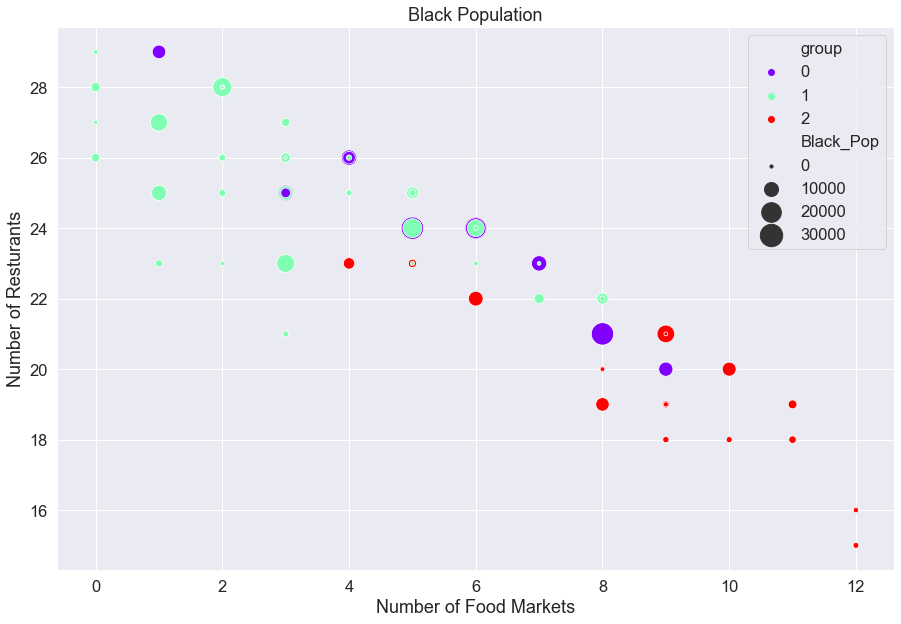

In [507]:

# black Population
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x="Sum_FoodMarkets", y="Sum_Resturants",
                     hue='group',  size="Black_Pop",
                     palette=rainbow, sizes=(10, 500),
                     data=h_group_info1)

ax.set(xlabel='Number of Food Markets', ylabel='Number of Resturants')
ax.set_title('Black Population')

Text(0.5, 1.0, 'Hispanic Population')

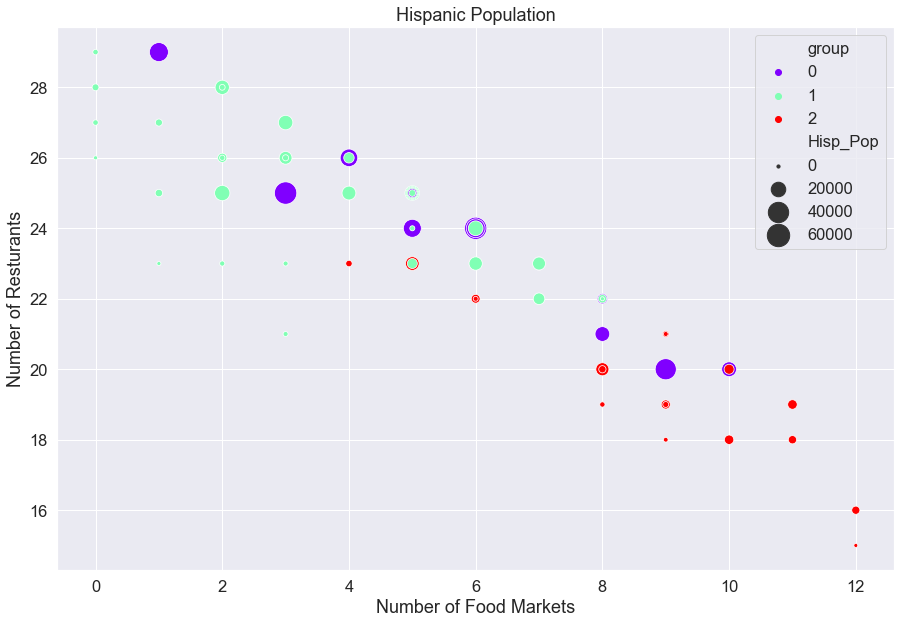

In [506]:
# Hispanic Population
# Asian Population
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x="Sum_FoodMarkets", y="Sum_Resturants",
                     hue='group',  size="Hisp_Pop",
                     palette=rainbow, sizes=(10, 500),
                     data=h_group_info1)

ax.set(xlabel='Number of Food Markets', ylabel='Number of Resturants')
ax.set_title('Hispanic Population')

Text(0.5, 1.0, 'Asian Population')

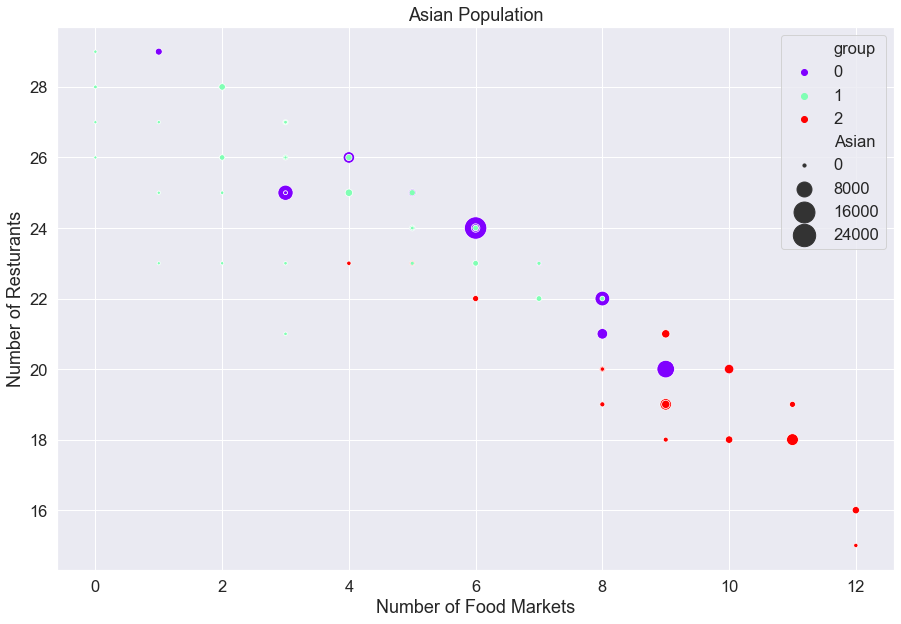

In [515]:
# Asian Population
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x="Sum_FoodMarkets", y="Sum_Resturants",
                     hue='group',  size="Asian",
                     palette=rainbow, sizes=(10, 500),
                     data=h_group_info1)

ax.set(xlabel='Number of Food Markets', ylabel='Number of Resturants')
ax.set_title('Asian Population')

Text(0.5, 1.0, 'White Population')

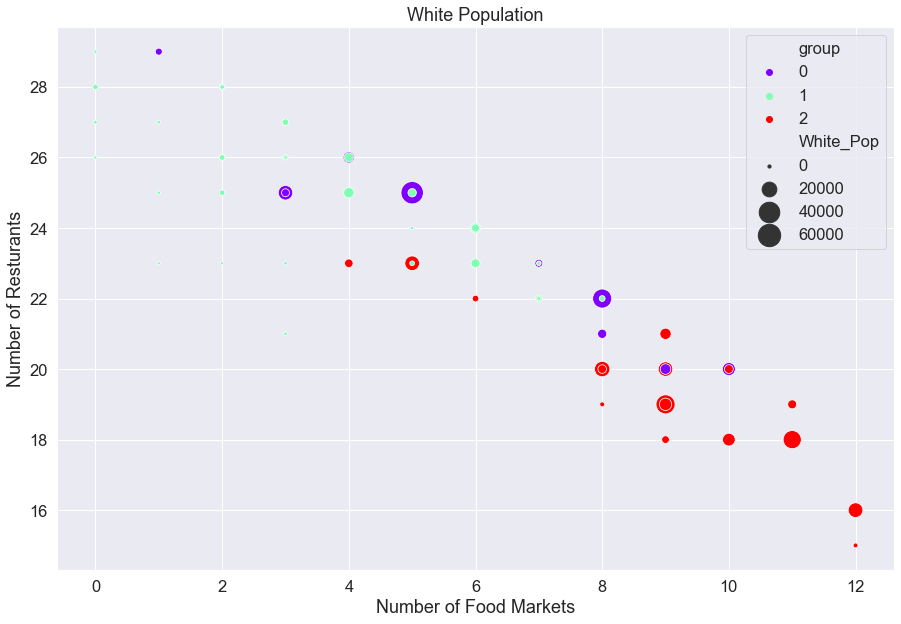

In [504]:

plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x="Sum_FoodMarkets", y="Sum_Resturants",
                     hue='group',  size="White_Pop",
                     palette=rainbow, sizes=(10, 500),
                     data=h_group_info1)

ax.set(xlabel='Number of Food Markets', ylabel='Number of Resturants')
ax.set_title('White Population')

Sum_FoodMarkets  Sum_Resturants
Sum_FoodMarkets         1.000000       -0.887964
Sum_Resturants         -0.887964        1.000000

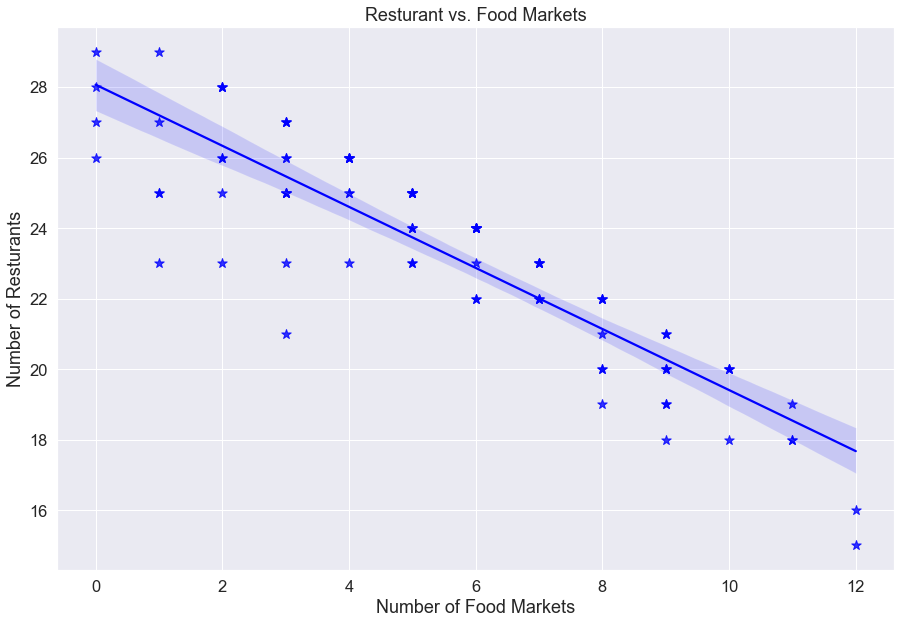

In [516]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='Sum_FoodMarkets', y='Sum_Resturants', data=h_group_info1, color='blue', marker='*', scatter_kws={'s': 100})
ax.set(xlabel='Number of Food Markets', ylabel='Number of Resturants')
ax.set_title('Resturant vs. Food Markets')
h_group_info1[['Sum_FoodMarkets','Sum_Resturants']].corr()



Sum_TotPop  Sum_Resturants
Sum_TotPop        1.000000       -0.092015
Sum_Resturants   -0.092015        1.000000

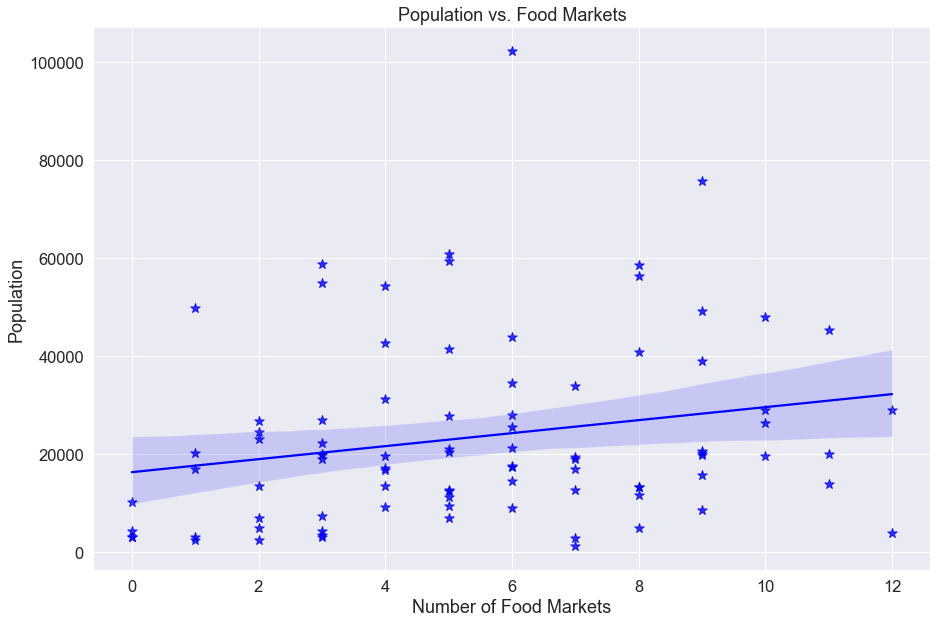

In [519]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='Sum_FoodMarkets', y='Sum_TotPop', data=h_group_info1, color='blue', marker='*', scatter_kws={'s': 100})
ax.set(xlabel='Number of Food Markets', ylabel='Population')
ax.set_title('Population vs. Food Markets')
h_group_info1[['Sum_TotPop','Sum_Resturants']].corr()

Sum_TotPop  Sum_Resturants
Sum_TotPop        1.000000       -0.092015
Sum_Resturants   -0.092015        1.000000

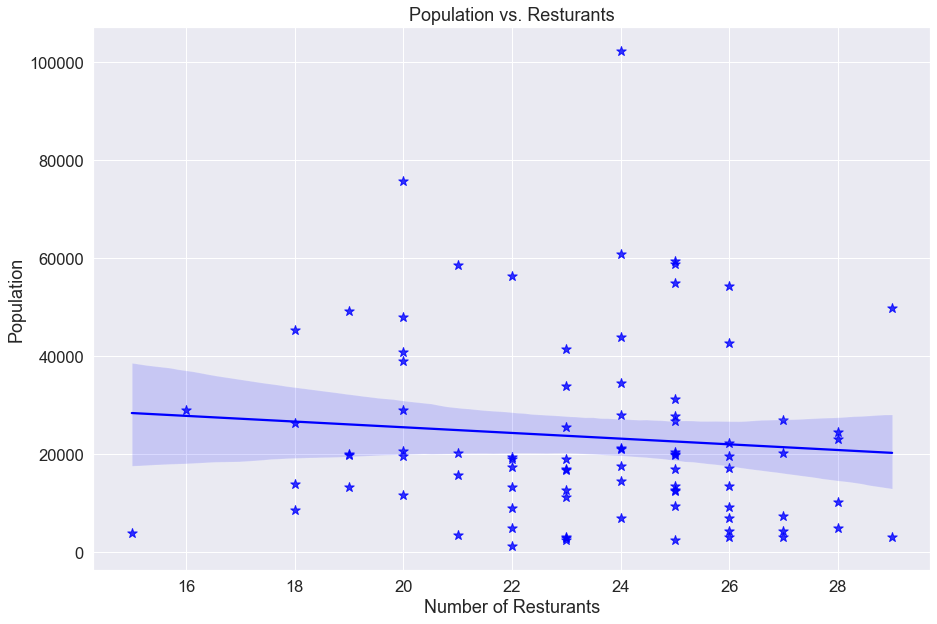

In [523]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='Sum_Resturants', y='Sum_TotPop', data=h_group_info1, color='blue', marker='*', scatter_kws={'s': 100})
ax.set(xlabel='Number of Resturants', ylabel='Population')
ax.set_title('Population vs. Resturants')
h_group_info1[['Sum_TotPop','Sum_Resturants']].corr()

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='Sum_FoodMarkets', y='Sum_Resturants', data=h_group_info1, color='blue', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Number of Food Markets', ylabel='Number of Resturants')
ax.set_title('Resturant vs. Food Markets')

Text(0.5, 1.0, 'Resturant vs. Food Markets')

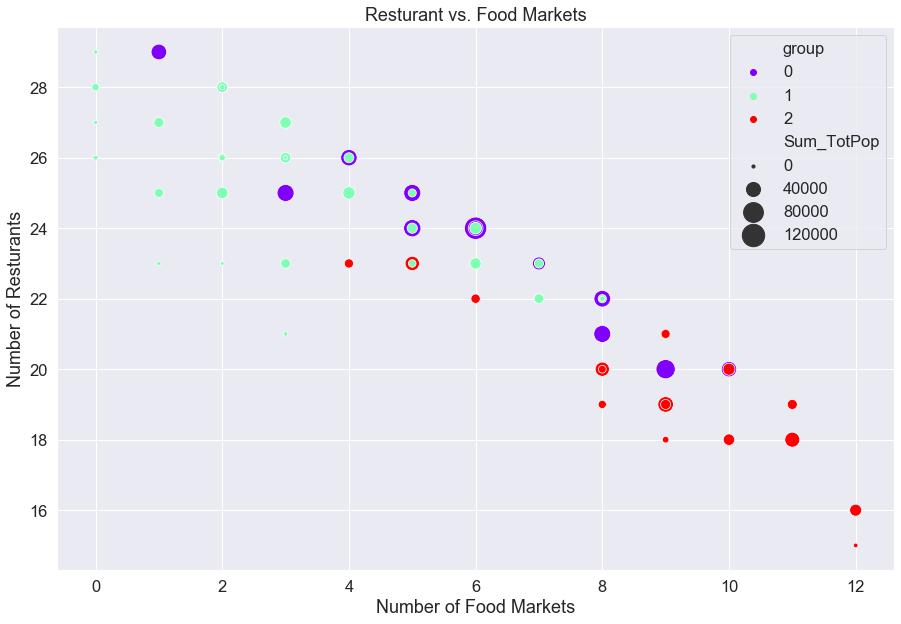

In [503]:


plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x="Sum_FoodMarkets", y="Sum_Resturants",
                     hue='group',  size="Sum_TotPop",
                     palette=rainbow, sizes=(10, 500),
                     data=h_group_info1)
    
ax.set(xlabel='Number of Food Markets', ylabel='Number of Resturants')
ax.set_title('Resturant vs. Food Markets')